# Import Libraries

In [124]:
import pandas as pd
pd.options.display.max_rows = 100 
pd.options.display.max_columns = 50
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns
import numpy as np
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
import itertools
import statsmodels.api as sm
from matplotlib.pylab import rcParams
import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# Load All Data Sets

In [2]:
arg_sales1 = pd.read_csv('/Users/will4856/inspire_brands_case_study_data/arg_sales_2015_2016.csv')

In [3]:
arg_sales3 = pd.read_csv('/Users/will4856/inspire_brands_case_study_data/arg_sales_2017_2018.csv')

In [4]:
tv_media = pd.read_csv('/Users/will4856/inspire_brands_case_study_data/case_study_media_data.csv')

In [5]:
competition = pd.read_csv('/Users/will4856/inspire_brands_case_study_data/Competitive Data.csv')

In [6]:
print_media = pd.read_csv('/Users/will4856/inspire_brands_case_study_data/store print info.csv')

In [7]:
restaurant = pd.read_csv('/Users/will4856/inspire_brands_case_study_data/restaurant.csv')

In [8]:
weather1 = pd.read_csv('/Users/will4856/inspire_brands_case_study_data/weather_2015.csv')

In [9]:
weather2 = pd.read_csv('/Users/will4856/inspire_brands_case_study_data/weather_2016.csv')

In [10]:
weather3 = pd.read_csv('/Users/will4856/inspire_brands_case_study_data/weather_2017.csv')

In [11]:
weather4 = pd.read_csv('/Users/will4856/inspire_brands_case_study_data/weather_2018.csv')

# Data Cleaning

## Arg_sales

### Combine arg_sales1 and arg_sales3 into one dataframe

In [12]:
arg_sales = pd.concat([arg_sales1, arg_sales3])

### Change Days_Date column to DateTime format

In [13]:
arg_sales['Days_Date'] = pd.to_datetime(arg_sales['Days_Date'])

In [14]:
print("There are",len(arg_sales['Rest_Number'].value_counts()), "unique restaurants included in the sales chart")

There are 1169 unique restaurants included in the sales chart


### Grouped arg_sales data frame by Rest_Number, Fiscal_Year, and Fiscal_Week_Number

In [15]:
arg_sales_sum_grouped = arg_sales.groupby(['Rest_Number', 'Fiscal_Year','Fiscal_Week_Number']).agg({'Sales_TY':'sum'})
arg_sales_sum_grouped.columns = ['Sum_Sales_For_Week']
#arg_sales_sum_grouped = arg_sales_sum_grouped.reset_index()
arg_sales_sum_grouped.head(25)

Sum_Sales_For_Week
Rest_Number Fiscal_Year Fiscal_Week_Number                    
1           2015        1                             14808.43
                        2                             11590.93
                        3                             13627.44
                        4                             15834.42
                        5                             17747.08
                        6                             21567.89
                        7                             18637.83
                        8                             16542.51
                        9                             19725.59
                        10                            18668.14
                        11                            18628.39
                        12                            18115.05
                        13                            20870.15
                        14                            21138.09
                        15                            18398.85
                        16                            20857.54
                        17                            20200.84
                        18                            23338.69
                        19                            19060.45
                        20                            16078.22
                        21                            18541.92
                        22                            16089.08
                        23                            17705.03
                        24                            17095.14
                        25                            16748.93

## tv_media

In [16]:
tv_media.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13728 entries, 0 to 13727
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   rest_dma_code       13728 non-null  int64  
 1   fiscal_year         13728 non-null  int64  
 2   fiscal_week_number  13728 non-null  int64  
 3   OnAir_TY            13728 non-null  int64  
 4   Equal_TRPS_CM_TY    13728 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 536.4 KB


## competition

### Sort values by Store # and reset index

In [17]:
competition = competition.sort_values('Store #')
competition = competition.reset_index().drop(columns = ['index'])
competition.head()

,Store #,# of McDonalds <1 mi,# of Subway <1 mi,# of Wendys <1 mi,# of Burger King <1 mi,# of Taco Bell <1 mi,# of McDonalds <0.5 mi,# of Subway <0.5 mi,# of Wendys <0.5 mi,# of Burger King <0.5 mi,# of Taco Bell <0.5 mi
0,1,1,1,0,0,1,1,1,0,0,0
1,2,1,2,1,0,1,1,1,1,0,1
2,3,1,1,0,0,1,1,1,0,0,0
3,4,1,2,1,1,0,0,1,1,1,0
4,10,1,1,1,0,1,0,1,0,0,0


### Dropped redundant competition columns

In [18]:
competition.drop(columns = ['# of McDonalds <0.5 mi', '# of Subway <0.5 mi', '# of Wendys <0.5 mi', 
                            '# of Burger King <0.5 mi', '# of Taco Bell <0.5 mi'], inplace = True)

### Add sum_of_competitors column to easily keep track of amount of competition within store radius

In [19]:
competition['sum_of_competitors'] = competition.sum(axis = 1) - competition['Store #']
competition.head()

,Store #,# of McDonalds <1 mi,# of Subway <1 mi,# of Wendys <1 mi,# of Burger King <1 mi,# of Taco Bell <1 mi,sum_of_competitors
0,1,1,1,0,0,1,3
1,2,1,2,1,0,1,5
2,3,1,1,0,0,1,3
3,4,1,2,1,1,0,5
4,10,1,1,1,0,1,4


## print_media

In [20]:
print_media.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40380 entries, 0 to 40379
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   rest_number         40380 non-null  int64 
 1   drop_date           40380 non-null  object
 2   fiscal_year         40380 non-null  int64 
 3   fiscal_week_number  40380 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.2+ MB


### Sort by rest_number, fiscal_year, and fiscal_week_number

In [21]:
print_media = print_media.sort_values(['rest_number','fiscal_year', 'fiscal_week_number'])
print_media = print_media.reset_index().drop(columns = ['index'])
print_media.head()

,rest_number,drop_date,fiscal_year,fiscal_week_number
0,1,1/27/2015,2015,5
1,1,2/24/2015,2015,9
2,1,3/24/2015,2015,13
3,1,4/28/2015,2015,18
4,1,7/28/2015,2015,31


### Convert drop_date to datetime format

In [22]:
print_media['drop_date'] = pd.to_datetime(print_media['drop_date'])

## restaurant

### Drop NaN value from REST_NUMBER column 

In [23]:
restaurant = restaurant.loc[restaurant['REST_NUMBER'].isna() == False]
restaurant.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5354 entries, 0 to 5354
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   REST_NUMBER     5354 non-null   float64
 1   REST_STATUS     5354 non-null   object 
 2   REST_ADDRSTATE  4887 non-null   object 
 3   REST_REMODELDT  5354 non-null   int64  
 4   REST_OPENDATE   5354 non-null   object 
 5   REST_CLOSEDATE  5354 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 292.8+ KB


### Convert REST_NUMBER to int type

In [24]:
restaurant['REST_NUMBER'] = restaurant['REST_NUMBER'].astype('int')

### Convert REST_REMODELDT, REST_OPENDATE, REST_CLOSEDATE, to date_time

In [25]:
restaurant['REST_REMODELDT'] = pd.to_datetime(restaurant['REST_REMODELDT'], format='%Y%m%d')

In [26]:
restaurant['REST_OPENDATE'] = pd.to_datetime(restaurant['REST_OPENDATE'])
restaurant['REST_CLOSEDATE'] = pd.to_datetime(restaurant['REST_CLOSEDATE'])

### Sort by REST_NUMBER and reset index

In [27]:
restaurant = restaurant.sort_values('REST_NUMBER').reset_index().drop(columns = 'index')

## weather

### Combine all weather data frames into one, drop all rows with NaN in all columns

In [28]:
weather = pd.concat([weather1, weather2, weather3, weather4]).dropna(how='all')
weather.head()

,rest_number,rest_dma_code,rest_dma_desc,Date_TY,Temp_Avg,Temp_Max,Temp_Min,Thunderstorm_bucket,Rain_bucket,Snow_bucket,snow,thunderstorm,rain,clear_weather
0,1.0,536.0,YOUNGSTOWN,2/2/2015,22.858571,38.93,13.73,NaN,moderate,NaN,0.0,0.0,1.0,0.0
1,1.0,536.0,YOUNGSTOWN,5/8/2015,77.630000,83.93,62.33,NaN,NaN,NaN,0.0,0.0,0.0,1.0
2,1.0,536.0,YOUNGSTOWN,2/9/2015,25.430000,26.33,24.53,NaN,mild,NaN,0.0,0.0,1.0,0.0
3,1.0,536.0,YOUNGSTOWN,3/7/2015,26.844285,35.33,17.33,NaN,NaN,mild,1.0,0.0,0.0,1.0
4,1.0,536.0,YOUNGSTOWN,2/10/2015,22.344285,28.13,17.33,NaN,NaN,mild,1.0,0.0,0.0,1.0


### Use for loop to convert all int_cols to int type

In [29]:
int_cols = ['rest_number', 'rest_dma_code', 'snow', 'thunderstorm', 'rain', 'clear_weather']

In [30]:
for x in int_cols:
    weather[x] = weather[x].astype('int')
weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1645006 entries, 0 to 385701
Data columns (total 14 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   rest_number          1645006 non-null  int64  
 1   rest_dma_code        1645006 non-null  int64  
 2   rest_dma_desc        1645006 non-null  object 
 3   Date_TY              1645006 non-null  object 
 4   Temp_Avg             1645006 non-null  float64
 5   Temp_Max             1645006 non-null  float64
 6   Temp_Min             1645006 non-null  float64
 7   Thunderstorm_bucket  175039 non-null   object 
 8   Rain_bucket          675064 non-null   object 
 9   Snow_bucket          150291 non-null   object 
 10  snow                 1645006 non-null  int64  
 11  thunderstorm         1645006 non-null  int64  
 12  rain                 1645006 non-null  int64  
 13  clear_weather        1645006 non-null  int64  
dtypes: float64(3), int64(6), object(5)
memory usage: 18

### Convert Date_TY column to DateTime

In [31]:
weather['Date_TY'] = pd.to_datetime(weather['Date_TY'])

### Sort Values by rest_number and Date_TY

In [32]:
weather = weather.sort_values(['rest_number', 'Date_TY'])

## Combine Data Frames to One

### Combine restaurant, arg_sales , competition

In [33]:
weekly_sales = arg_sales.groupby(['Rest_Number', 'Fiscal_Year','Fiscal_Week_Number']).agg({'Sales_TY':'sum'}).reset_index()

In [34]:
modeling_df = arg_sales.merge(weekly_sales, how='right', left_on=['Rest_Number', 'Fiscal_Year', 'Fiscal_Week_Number'], 
                right_on = ['Rest_Number', 'Fiscal_Year', 'Fiscal_Week_Number']).drop_duplicates('Sales_TY_y', 
                                                                                                 keep= 'first')
modeling_df = modeling_df.reset_index().drop(columns = ['index', 'Days_Date','Sales_TY_x'])

In [35]:
modeling_df = modeling_df.merge(restaurant, how = 'left', left_on= 'Rest_Number', 
                                right_on= 'REST_NUMBER').drop(columns = ['REST_NUMBER'])

In [36]:
modeling_df = modeling_df.merge(competition, how='left', left_on='Rest_Number', 
                                right_on='Store #').drop(columns = 'Store #')

In [37]:
modeling_df = modeling_df.rename(columns = {'Sales_TY_y':'Sum Total Sales'})

### Add tv_media 

In [38]:
modeling_df = modeling_df.merge(tv_media, how = 'left', left_on = ['Rest_DMA_Code','Fiscal_Year', 'Fiscal_Week_Number'], 
                 right_on= ['rest_dma_code','fiscal_year','fiscal_week_number'])

### Add print_media

In [39]:
modeling_df = modeling_df.merge(print_media, how = 'left', left_on=['Rest_Number', 'Fiscal_Year', 'Fiscal_Week_Number'],
                 right_on = ['rest_number','fiscal_year', 'fiscal_week_number'])

In [40]:
modeling_df = modeling_df[['Rest_Number',
 'Rest_DMA_Code',
 'Rest_DMA_Desc',
 'Fiscal_Year',
 'Fiscal_Week_Number',
 'Sum Total Sales',
 'REST_STATUS',
 'REST_ADDRSTATE',
 'REST_REMODELDT',
 'REST_OPENDATE',
 'REST_CLOSEDATE',
 '# of McDonalds <1 mi',
 '# of Subway <1 mi',
 '# of Wendys <1 mi',
 '# of Burger King <1 mi',
 '# of Taco Bell <1 mi',
 'sum_of_competitors',
 'OnAir_TY',
 'Equal_TRPS_CM_TY',
 'drop_date']]

In [41]:
modeling_df.head()

,Rest_Number,Rest_DMA_Code,Rest_DMA_Desc,Fiscal_Year,Fiscal_Week_Number,Sum Total Sales,REST_STATUS,REST_ADDRSTATE,REST_REMODELDT,REST_OPENDATE,REST_CLOSEDATE,# of McDonalds <1 mi,# of Subway <1 mi,# of Wendys <1 mi,# of Burger King <1 mi,# of Taco Bell <1 mi,sum_of_competitors,OnAir_TY,Equal_TRPS_CM_TY,drop_date
0,1,536,YOUNGSTOWN,2015,1,14808.43,Open,OH,2016-11-28,1964-07-23,1753-01-01,1.0,1.0,0.0,0.0,1.0,3.0,0.0,0.0,NaT
1,1,536,YOUNGSTOWN,2015,2,11590.93,Open,OH,2016-11-28,1964-07-23,1753-01-01,1.0,1.0,0.0,0.0,1.0,3.0,0.0,0.0,NaT
2,1,536,YOUNGSTOWN,2015,3,13627.44,Open,OH,2016-11-28,1964-07-23,1753-01-01,1.0,1.0,0.0,0.0,1.0,3.0,0.0,0.0,NaT
3,1,536,YOUNGSTOWN,2015,4,15834.42,Open,OH,2016-11-28,1964-07-23,1753-01-01,1.0,1.0,0.0,0.0,1.0,3.0,1.0,41.3,NaT
4,1,536,YOUNGSTOWN,2015,5,17747.08,Open,OH,2016-11-28,1964-07-23,1753-01-01,1.0,1.0,0.0,0.0,1.0,3.0,1.0,123.8,2015-01-27


In [42]:
int_cols = ['# of McDonalds <1 mi',
 '# of Subway <1 mi',
 '# of Wendys <1 mi',
 '# of Burger King <1 mi',
 '# of Taco Bell <1 mi',
 '# of McDonalds <0.5 mi',
 '# of Subway <0.5 mi',
 '# of Wendys <0.5 mi',
 '# of Burger King <0.5 mi',
 '# of Taco Bell <0.5 mi',
 'sum_of_competitors',
 'OnAir_TY',
 'Equal_TRPS_CM_TY']
for x in int_cols:
    try:
        modeling_df[x] = modeling_df[x].fillna(0.0)
    except: 
        continue
    try:
        modeling_df[x] = modeling_df[x].astype('int')
    except:
        continue

In [43]:
modeling_df = modeling_df.rename(columns = {'drop_date':'print_media_drop_date'})

In [44]:
modeling_df = modeling_df.loc[modeling_df['REST_STATUS'] == 'Open']

In [45]:
arg_sales.sort_values('Days_Date', ascending = False)

,Rest_Number,Rest_DMA_Code,Rest_DMA_Desc,Fiscal_Year,Fiscal_Week_Number,Days_Date,Sales_TY
785505,9002,524,ATLANTA,2018,52,2018-12-30,2508.64
534221,6949,613,MINNEAPOLIS-ST. PAUL,2018,52,2018-12-30,1878.49
538576,6976,524,ATLANTA,2018,52,2018-12-30,3913.39
537851,6975,535,"COLUMBUS, OH",2018,52,2018-12-30,2963.58
93347,567,557,KNOXVILLE,2018,52,2018-12-30,4317.43
...,...,...,...,...,...,...,...
583165,7476,613,MINNEAPOLIS-ST. PAUL,2015,1,2014-12-29,2062.00
116413,826,535,"COLUMBUS, OH",2015,1,2014-12-29,1711.40
582433,7475,613,MINNEAPOLIS-ST. PAUL,2015,1,2014-12-29,3769.49
117145,828,510,CLEVELAND-AKRON,2015,1,2014-12-29,4910.36


In [46]:
for x in list(modeling_df.columns):
    modeling_df.rename(columns = {x : x.lower()}, inplace=True)

In [47]:
modeling_df = modeling_df.loc[modeling_df['fiscal_year'] != 0]

In [48]:
modeling_df

,rest_number,rest_dma_code,rest_dma_desc,fiscal_year,fiscal_week_number,sum total sales,rest_status,rest_addrstate,rest_remodeldt,rest_opendate,rest_closedate,# of mcdonalds <1 mi,# of subway <1 mi,# of wendys <1 mi,# of burger king <1 mi,# of taco bell <1 mi,sum_of_competitors,onair_ty,equal_trps_cm_ty,print_media_drop_date
0,1,536,YOUNGSTOWN,2015,1,14808.43,Open,OH,2016-11-28,1964-07-23,1753-01-01,1,1,0,0,1,3,0,0,NaT
1,1,536,YOUNGSTOWN,2015,2,11590.93,Open,OH,2016-11-28,1964-07-23,1753-01-01,1,1,0,0,1,3,0,0,NaT
2,1,536,YOUNGSTOWN,2015,3,13627.44,Open,OH,2016-11-28,1964-07-23,1753-01-01,1,1,0,0,1,3,0,0,NaT
3,1,536,YOUNGSTOWN,2015,4,15834.42,Open,OH,2016-11-28,1964-07-23,1753-01-01,1,1,0,0,1,3,1,41,NaT
4,1,536,YOUNGSTOWN,2015,5,17747.08,Open,OH,2016-11-28,1964-07-23,1753-01-01,1,1,0,0,1,3,1,123,2015-01-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208767,9002,524,ATLANTA,2018,48,21777.43,Open,GA,1753-01-01,2006-07-06,1753-01-01,1,2,0,0,0,3,0,26,2018-11-27
208768,9002,524,ATLANTA,2018,49,22758.79,Open,GA,1753-01-01,2006-07-06,1753-01-01,1,2,0,0,0,3,0,9,NaT
208769,9002,524,ATLANTA,2018,50,21990.28,Open,GA,1753-01-01,2006-07-06,1753-01-01,1,2,0,0,0,3,0,0,NaT
208770,9002,524,ATLANTA,2018,51,21613.24,Open,GA,1753-01-01,2006-07-06,1753-01-01,1,2,0,0,0,3,0,8,NaT


# Feature Engineering

## Adding Restaurant_Age (Time Since Opened or Last Remodel)

In [49]:
modeling_df['last_date'] = pd.to_datetime('2018-12-30')

In [50]:
modeling_df['days_since_open'] = modeling_df['last_date'] - modeling_df['rest_opendate']

In [51]:
modeling_df['days_since_remodel'] = modeling_df['last_date'] - modeling_df['rest_remodeldt']

In [52]:
modeling_df['days_since_open_edit'] = [int(str(x)[:-14]) for x in modeling_df['days_since_open']]
modeling_df['days_since_remodel_edit'] = [int(str(x)[:-14]) for x in modeling_df['days_since_remodel']]

In [53]:
def merge(list1, list2): 
    merged_list = [(list1[i], list2[i]) for i in range(0, len(list1))] 
    return merged_list

In [54]:
tuple_list = merge(list(modeling_df['days_since_open_edit']), list(modeling_df['days_since_remodel_edit']))

In [55]:
least_days = []
for x in tuple_list:
    least_days.append(min(x))

In [56]:
least_days = pd.DataFrame(least_days, columns = ['least_days'])

In [57]:
modeling_df = least_days.join(modeling_df)

In [58]:
modeling_df = modeling_df.drop(columns=['last_date', 'days_since_open', 'days_since_remodel', 'days_since_open_edit', 
                          'days_since_remodel_edit'])

In [59]:
int_cols = ['rest_number','rest_dma_code','fiscal_year','fiscal_week_number','# of mcdonalds <1 mi', '# of subway <1 mi', '# of wendys <1 mi',
       '# of burger king <1 mi', '# of taco bell <1 mi',
       '# of mcdonalds <0.5 mi', '# of subway <0.5 mi', '# of wendys <0.5 mi',
       '# of burger king <0.5 mi', '# of taco bell <0.5 mi',
       'sum_of_competitors', 'onair_ty', 'equal_trps_cm_ty']
for x in int_cols:
    try:
        modeling_df[x] = modeling_df[x].fillna(0.0)
    except:
        continue
    try:
        modeling_df[x] = modeling_df[x].astype('int')
    except:
        continue

In [60]:
modeling_df.rename(columns = {'least_days':'rest_age'}, inplace = True)

# EDA

## Combine weather and arg_sales data frames

In [61]:
sales_and_weather = arg_sales.merge(weather, left_on = ['Rest_Number', 'Days_Date'], right_on= ['rest_number', 'Date_TY']).reset_index().drop(
    columns = ['index', 'rest_number', 'rest_dma_code', 'rest_dma_desc', 'Date_TY'])

In [62]:
print('Combining these dataframes lost',len(arg_sales) - len(sales_and_weather),'rows of information')

Combining these dataframes lost 48900 rows of information


### Plotting Average Sales Per Fiscal Week by Weather Conditions

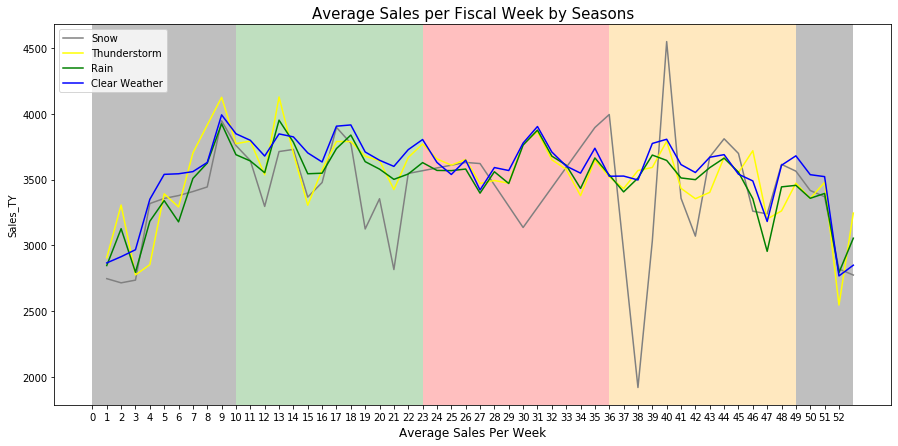

In [63]:
plt.figure(figsize = (15,7))
sns.lineplot(sales_and_weather.loc[sales_and_weather['snow'] == 1].groupby('Fiscal_Week_Number').agg({'Sales_TY': 'mean'}).reset_index()['Fiscal_Week_Number'],
            sales_and_weather.loc[sales_and_weather['snow'] == 1].groupby('Fiscal_Week_Number').agg({'Sales_TY': 'mean'}).reset_index()['Sales_TY'], 
             color = 'grey', label = 'Snow')
sns.lineplot(sales_and_weather.loc[sales_and_weather['thunderstorm'] == 1].groupby('Fiscal_Week_Number').agg({'Sales_TY': 'mean'}).reset_index()['Fiscal_Week_Number'],
            sales_and_weather.loc[sales_and_weather['thunderstorm'] == 1].groupby('Fiscal_Week_Number').agg({'Sales_TY': 'mean'}).reset_index()['Sales_TY'], 
             color = 'yellow', label = 'Thunderstorm')
sns.lineplot(sales_and_weather.loc[sales_and_weather['rain'] == 1].groupby('Fiscal_Week_Number').agg({'Sales_TY': 'mean'}).reset_index()['Fiscal_Week_Number'],
            sales_and_weather.loc[sales_and_weather['rain'] == 1].groupby('Fiscal_Week_Number').agg({'Sales_TY': 'mean'}).reset_index()['Sales_TY'], 
             color = 'green', label = 'Rain')
sns.lineplot(sales_and_weather.loc[sales_and_weather['clear_weather'] == 1].groupby('Fiscal_Week_Number').agg({'Sales_TY': 'mean'}).reset_index()['Fiscal_Week_Number'],
            sales_and_weather.loc[sales_and_weather['clear_weather'] == 1].groupby('Fiscal_Week_Number').agg({'Sales_TY': 'mean'}).reset_index()['Sales_TY'], 
             color = 'blue', label = 'Clear Weather')
plt.xlabel('Fiscal Week Number', size = 12)
plt.xlabel('Average Sales Per Week', size = 12)
plt.title('Average Sales per Fiscal Week by Seasons', size =15)
plt.xticks(np.arange(0,53))
plt.axvspan(0,10, facecolor = 'k', alpha = 0.25)
plt.axvspan(49,53, facecolor = 'k', alpha = 0.25)
plt.axvspan(10,23, facecolor = 'green', alpha = 0.25)
plt.axvspan(23,36, facecolor = 'red', alpha = 0.25)
plt.axvspan(36,49, facecolor = 'orange', alpha = 0.25)
plt.show()

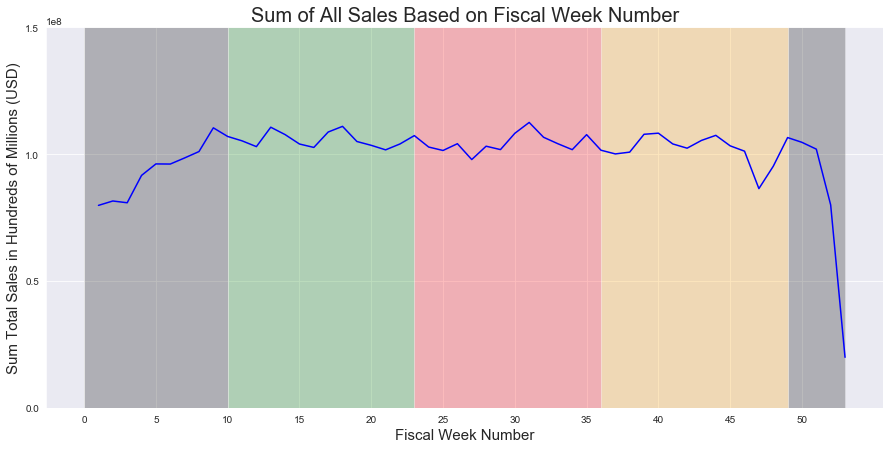

In [64]:
plt.figure(figsize = (15,7))
sns.set_style('darkgrid')
sns.lineplot(arg_sales.groupby('Fiscal_Week_Number').sum().index,
             arg_sales.groupby('Fiscal_Week_Number').sum()['Sales_TY'],color = 'blue')
plt.xlabel('Fiscal Week Number', size = 15)
plt.ylabel('Sum Total Sales in Hundreds of Millions (USD)', size = 15)
plt.title('Sum of All Sales Based on Fiscal Week Number', size =20)
plt.xticks(np.arange(0,53,5))
plt.yticks(np.arange(0, 200000000, 50000000))
plt.axvspan(0,10, facecolor = 'k', alpha = 0.25, label = 'winter')
plt.axvspan(49,53, facecolor = 'k', alpha = 0.25)
plt.axvspan(10,23, facecolor = 'green', alpha = 0.25, label = 'spring')
plt.axvspan(23,36, facecolor = 'red', alpha = 0.25, label = 'summer')
plt.axvspan(36,49, facecolor = 'orange', alpha = 0.25, label = 'fall')
plt.show()

## arg_sales Time Series

In [65]:
def quick_time_series():
    """takes restaurant number as input and quickly plots time series of that restaurant's sales over time
    
    Args:
    
    rest_number: corresponds to Inspire Brands restaurant number
    
    
    """
    rest_number = int(input("Enter # of Restaurant for Quick Time Series: "))
    dates = [2015, 2016, 2017, 2018]
    plt.figure(figsize = (20,5))
    plt.title('Time Series of Restaurant #{}'.format(rest_number), size=15)
    plt.xlabel('Date', size = 12)
    plt.ylabel('Sales Total per Day', size = 12)
    for x in dates:
        plt.plot(arg_sales.loc[(arg_sales['Rest_Number'] == rest_number) & (arg_sales['Fiscal_Year'] == x)]['Days_Date'],
                 arg_sales.loc[(arg_sales['Rest_Number'] == rest_number) & (arg_sales['Fiscal_Year'] == x)]['Sales_TY'])
    plt.show()

In [66]:
#quick_time_series()

KeyboardInterrupt: 

## Sales by State

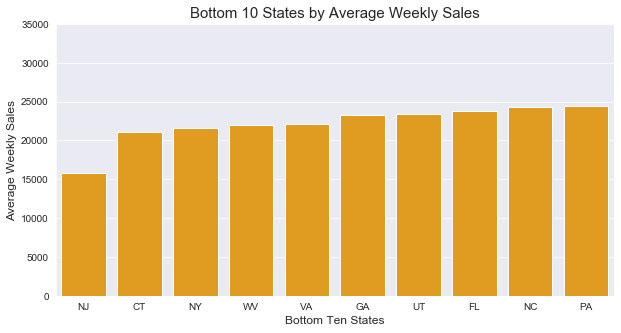

In [67]:
plt.figure(figsize = (10,5))
sns.barplot(modeling_df.groupby('rest_addrstate').mean().sort_values('sum total sales')[:10].index,
            modeling_df.groupby('rest_addrstate').mean().sort_values('sum total sales')[:10]['sum total sales'], 
            color = 'orange')
plt.ylabel('Average Weekly Sales', size = 12)
plt.xlabel('Bottom Ten States', size = 12)
plt.title('Bottom 10 States by Average Weekly Sales', size = 15)
plt.yticks(np.arange(0,40000, 5000))
plt.show()
            

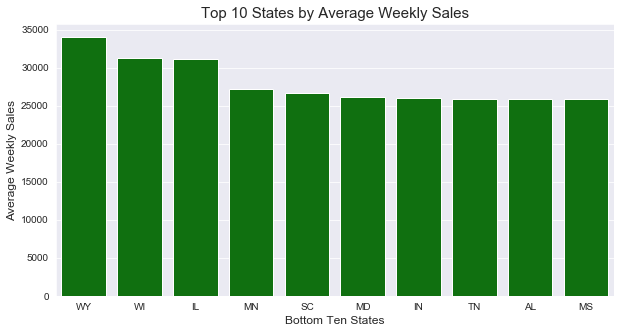

In [68]:
plt.figure(figsize = (10,5))
sns.barplot(modeling_df.groupby('rest_addrstate').mean().sort_values('sum total sales', 
                                                                     ascending = False)[:10].index,
            modeling_df.groupby('rest_addrstate').mean().sort_values('sum total sales', 
                                                                     ascending = False)[:10]['sum total sales'], 
            color = 'green')
plt.ylabel('Average Weekly Sales', size = 12)
plt.xlabel('Bottom Ten States', size = 12)
plt.title('Top 10 States by Average Weekly Sales', size = 15)
plt.show()

## print_media drop_date

In [69]:
def plot_yearly_series_w_drop_dates_diff():
    rest_number = int(input('Input the Restaurant Number to Plot Time Series: '))
    year = int(input('Input Year to View: '))
    drop_dates = list(print_media.loc[(print_media['rest_number'] == rest_number) & (print_media['fiscal_year'] == year)]['drop_date'])
    arg_sales_test = arg_sales.loc[(arg_sales['Rest_Number'] == rest_number) & (arg_sales['Fiscal_Year'] == year)]
    arg_sales_test['print_media_drop_date'] = [x if x in drop_dates else None for x in arg_sales_test['Days_Date']]
    plt.figure(figsize = (15,5))
    plt.plot(arg_sales_test['Days_Date'],arg_sales_test['Sales_TY'].diff(), color = 'blue', label='Daily Sales Values')
    plt.scatter(arg_sales_test['print_media_drop_date'],arg_sales_test['Sales_TY'].diff(), color = 'red', label = 'Print Media Drop Dates')
    plt.title(print('Restaurant #',rest_number,'(',year,') Sales by Day and Print Media Drop Dates, Seasonality Removed'))
    plt.xlabel('Date', size=12)
    plt.legend()
    plt.show()

In [70]:
def plot_yearly_series_w_drop_dates():
    rest_number = int(input('Input the Restaurant Number to Plot Time Series: '))
    year = int(input('Input Year to View: '))
    drop_dates = list(print_media.loc[(print_media['rest_number'] == rest_number) & (print_media['fiscal_year'] == year)]['drop_date'])
    arg_sales_test = arg_sales.loc[(arg_sales['Rest_Number'] == rest_number) & (arg_sales['Fiscal_Year'] == year)]
    arg_sales_test['print_media_drop_date'] = [x if x in drop_dates else None for x in arg_sales_test['Days_Date']]
    plt.figure(figsize = (15,5))
    plt.plot(arg_sales_test['Days_Date'],arg_sales_test['Sales_TY'], color = 'blue', label='Daily Sales Values')
    plt.scatter(arg_sales_test['print_media_drop_date'],arg_sales_test['Sales_TY'], color = 'red', label = 'Print Media Drop Dates')
    plt.title(print('Restaurant #',rest_number,'(',year,') Sales by Day and Print Media Drop Dates'))
    plt.xlabel('Date', size=12)
    plt.ylabel('Daily Sales Totals in Dollars (USD)', size=15)
    plt.legend()
    plt.show()

In [71]:
#plot_yearly_series_w_drop_dates_diff()

In [72]:
#plot_yearly_series_w_drop_dates()

## Quantify Lift in Sales From Print Media Drop Dates

In [73]:
res = [] 
for i in list(arg_sales['Rest_Number']): 
    if i not in res: 
        res.append(i) 

In [74]:
drop_dates = list(print_media.loc[(print_media['rest_number'] == 1) & (print_media['fiscal_year'] == 2015)]['drop_date'])
arg_sales_test = arg_sales.loc[(arg_sales['Rest_Number'] == 1) & (arg_sales['Fiscal_Year'] == 2015)]
arg_sales_test['print_media_drop_date'] = [x if x in drop_dates else None for x in arg_sales_test['Days_Date']]

In [75]:
arg_sales_test.head(75)

,Rest_Number,Rest_DMA_Code,Rest_DMA_Desc,Fiscal_Year,Fiscal_Week_Number,Days_Date,Sales_TY,print_media_drop_date
0,1,536,YOUNGSTOWN,2015,1,2014-12-29,2600.03,NaT
1,1,536,YOUNGSTOWN,2015,1,2014-12-30,2333.04,NaT
2,1,536,YOUNGSTOWN,2015,1,2014-12-31,2045.05,NaT
3,1,536,YOUNGSTOWN,2015,1,2015-01-01,1355.33,NaT
4,1,536,YOUNGSTOWN,2015,1,2015-01-02,2645.63,NaT
5,1,536,YOUNGSTOWN,2015,1,2015-01-03,1988.65,NaT
6,1,536,YOUNGSTOWN,2015,1,2015-01-04,1840.70,NaT
7,1,536,YOUNGSTOWN,2015,2,2015-01-05,1503.85,NaT
8,1,536,YOUNGSTOWN,2015,2,2015-01-06,1705.02,NaT
9,1,536,YOUNGSTOWN,2015,2,2015-01-07,1588.74,NaT


In [76]:
percent_changes = []
number_of_drops = len(arg_sales_test.loc[arg_sales_test['print_media_drop_date'].isna() == False])
for i in range(0,number_of_drops):
    new_df1 = arg_sales_test.loc[arg_sales_test['print_media_drop_date'].isna() == False].reset_index()
    timestamp_test = new_df1.iloc[i]['print_media_drop_date'] + datetime.timedelta(days=3)
    new_sales = float(arg_sales_test.loc[arg_sales_test['Days_Date'] == timestamp_test]['Sales_TY'])
    new_df2 = arg_sales_test.loc[arg_sales_test['print_media_drop_date'].isna() == False].reset_index()
    old_sales = float(new_df2.iloc[i]['Sales_TY'])
    percent_changes.append(round(((new_sales - old_sales) / old_sales) * 100,1))
np.mean(percent_changes)

19.525

In [77]:
mean_percent_changes = []
for n in res[:2]:
    for year in [2015,2016,2017,2018]:
        drop_dates = list(print_media.loc[(print_media['rest_number'] == n) & (print_media['fiscal_year'] == year)]['drop_date'])
        arg_sales_test = arg_sales.loc[(arg_sales['Rest_Number'] == n) & (arg_sales['Fiscal_Year'] == year)]
        arg_sales_test['print_media_drop_date'] = [x if x in drop_dates else None for x in arg_sales_test['Days_Date']]
        number_of_drops = len(arg_sales_test.loc[(arg_sales_test['print_media_drop_date'].isna() == False)])
        percent_changes = []
        for i in range(0,number_of_drops):
            new_df1 = arg_sales_test.loc[arg_sales_test['print_media_drop_date'].isna() == False].reset_index()
            timestamp_test = new_df1.iloc[i]['print_media_drop_date'] + datetime.timedelta(days=3)
            new_sales = arg_sales_test.loc[arg_sales_test['Days_Date'] == timestamp_test]['Sales_TY']
            new_df2 = arg_sales_test.loc[arg_sales_test['print_media_drop_date'].isna() == False].reset_index()
            old_sales = int(new_df2.iloc[i]['Sales_TY'])
            try:
                percent_changes.append(round(((new_sales - old_sales) / old_sales) * 100,1))
            except:
                percent_changes.append(0)
        mean_percent_changes.append(np.mean(percent_changes))


    

In [78]:
mean_percent_changes

[19.549999999999997,
 nan,
 26.133333333333333,
 33.019999999999996,
 42.337500000000006,
 38.3125,
 40.65555555555556,
 45.98]

## Exploring MultiCollinearity

In [79]:
def make_heatmap(df,cols):
    plt.figure(figsize = (15,15))
    sns.heatmap(df[cols].corr(),annot=True,cmap='coolwarm')
    plt.show()
    print(abs(df[cols].corr()>.75).sum())

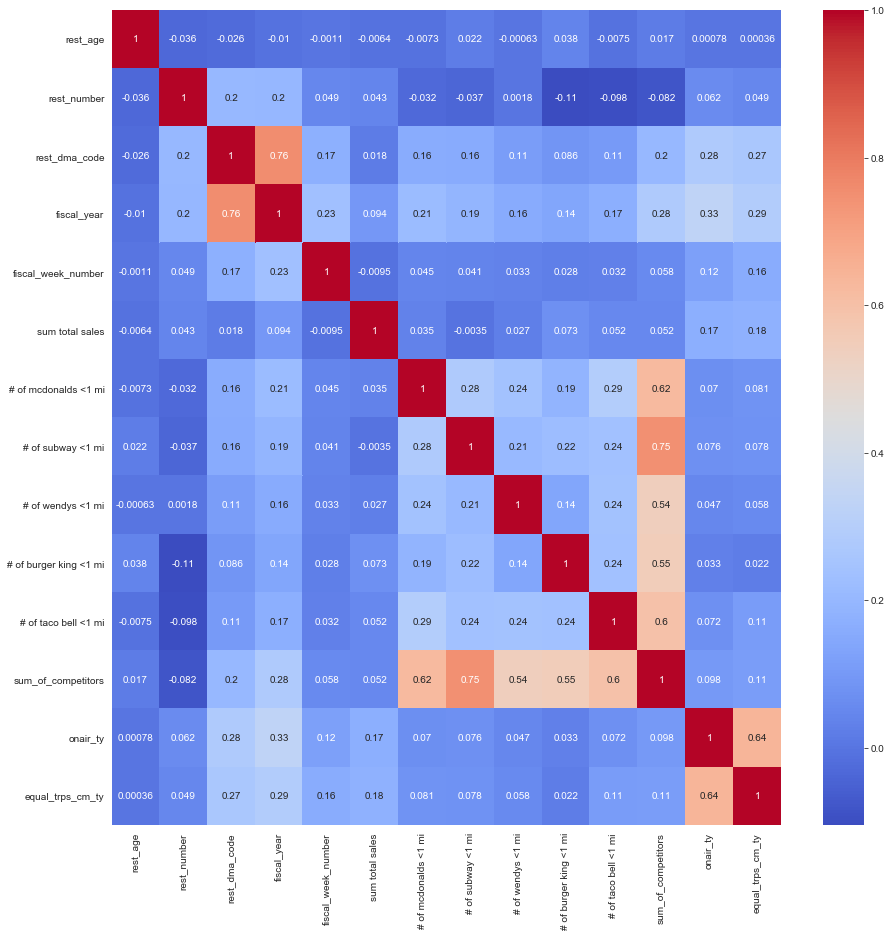

rest_age                  1
rest_number               1
rest_dma_code             2
fiscal_year               2
fiscal_week_number        1
sum total sales           1
# of mcdonalds <1 mi      1
# of subway <1 mi         1
# of wendys <1 mi         1
# of burger king <1 mi    1
# of taco bell <1 mi      1
sum_of_competitors        1
onair_ty                  1
equal_trps_cm_ty          1
dtype: int64


In [80]:
make_heatmap(modeling_df, list(modeling_df.columns))

In [81]:
modeling_df.drop(columns = ['# of mcdonalds <1 mi', '# of subway <1 mi', '# of wendys <1 mi',
                            '# of burger king <1 mi','# of taco bell <1 mi'], inplace = True)

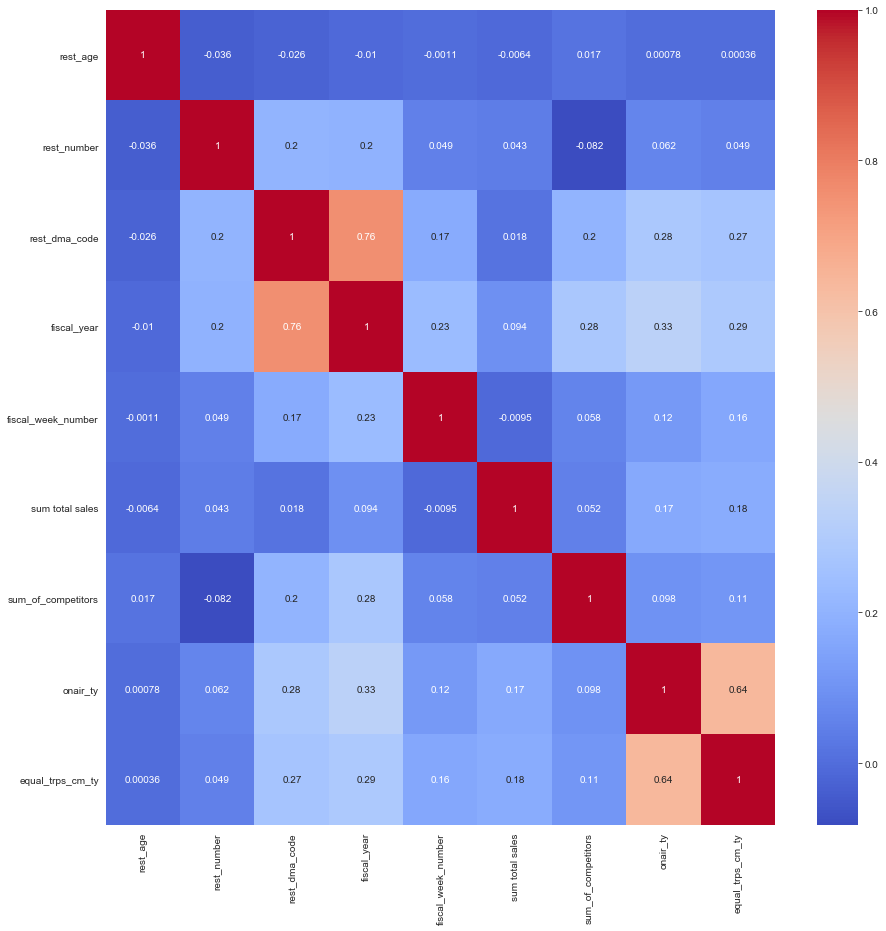

rest_age              1
rest_number           1
rest_dma_code         2
fiscal_year           2
fiscal_week_number    1
sum total sales       1
sum_of_competitors    1
onair_ty              1
equal_trps_cm_ty      1
dtype: int64


In [82]:
make_heatmap(modeling_df, list(modeling_df.columns))

In [83]:
modeling_dummied = modeling_df.copy()
modeling_dummied = pd.get_dummies(modeling_dummied, columns = ['rest_dma_code'], prefix = 'dummied', drop_first=True)
modeling_dummied.head()

,rest_age,rest_number,rest_dma_desc,fiscal_year,fiscal_week_number,sum total sales,rest_status,rest_addrstate,rest_remodeldt,rest_opendate,rest_closedate,sum_of_competitors,onair_ty,equal_trps_cm_ty,print_media_drop_date,dummied_501,dummied_502,dummied_504,dummied_505,dummied_507,dummied_508,dummied_509,dummied_510,dummied_511,dummied_512,...,dummied_565,dummied_566,dummied_569,dummied_570,dummied_573,dummied_577,dummied_584,dummied_588,dummied_596,dummied_611,dummied_613,dummied_630,dummied_632,dummied_639,dummied_640,dummied_649,dummied_659,dummied_673,dummied_676,dummied_691,dummied_698,dummied_724,dummied_736,dummied_737,dummied_770
0,762,1,YOUNGSTOWN,2015,1,14808.43,Open,OH,2016-11-28,1964-07-23,1753-01-01,3,0,0,NaT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,762,1,YOUNGSTOWN,2015,2,11590.93,Open,OH,2016-11-28,1964-07-23,1753-01-01,3,0,0,NaT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,762,1,YOUNGSTOWN,2015,3,13627.44,Open,OH,2016-11-28,1964-07-23,1753-01-01,3,0,0,NaT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,762,1,YOUNGSTOWN,2015,4,15834.42,Open,OH,2016-11-28,1964-07-23,1753-01-01,3,1,41,NaT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,762,1,YOUNGSTOWN,2015,5,17747.08,Open,OH,2016-11-28,1964-07-23,1753-01-01,3,1,123,2015-01-27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Sales by DMA_Code

In [84]:
modeling_df['city_state'] = modeling_df['rest_dma_desc'] + modeling_df['rest_addrstate']
modeling_df.rename(columns = {'sum total sales': 'sum_total_sales'}, inplace=True)

In [85]:
bottom10_dma = modeling_df.groupby(['city_state']).mean()[['rest_age','sum_total_sales','equal_trps_cm_ty']].sort_values('sum_total_sales')[:10]

In [86]:
city_state = []
for x in list(bottom10_dma.index):
    city_state.append(x.strip().replace('                        ',', '))

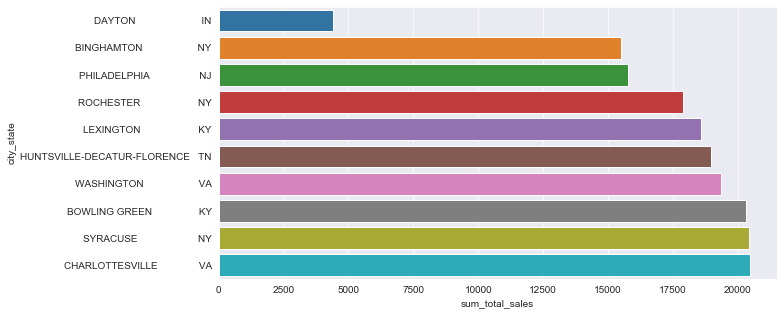

In [87]:
plt.figure(figsize=(10,5))
sns.barplot(data = bottom10_dma, x = bottom10_dma['sum_total_sales'], y=bottom10_dma.index, orient = 'h')

In [88]:
top10_dma = modeling_df.groupby(['city_state']).mean()[['rest_age',
                                            'sum_total_sales','equal_trps_cm_ty']].sort_values('sum_total_sales', ascending = False)[:10]

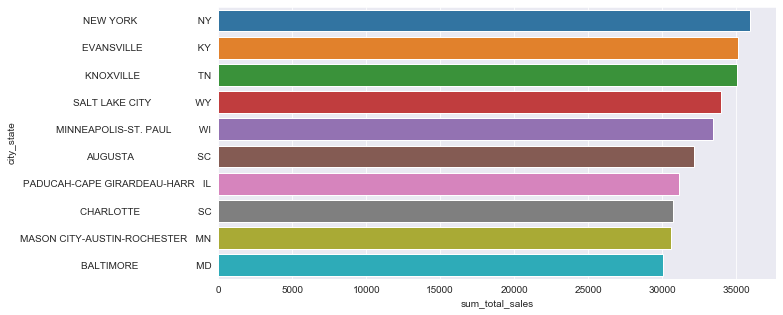

In [89]:
plt.figure(figsize=(10,5))
sns.barplot(data = top10_dma, x = top10_dma['sum_total_sales'], y=top10_dma.index, orient = 'h')

## Sales by Restaurant Age

In [90]:
mean_sales = modeling_df.loc[modeling_df['rest_number'] != 0].groupby('rest_number').agg({'sum_total_sales':'mean'}).reset_index()

In [91]:
rest_age = modeling_df.loc[modeling_df['rest_number'] != 0].drop_duplicates('rest_number')['rest_age'].reset_index()

In [92]:
age_explore = pd.concat([mean_sales, rest_age], axis=1)[['rest_number', 'rest_age', 'sum_total_sales']]
age_explore = age_explore.loc[age_explore['rest_age'] > 1]

In [93]:
print('Average age in days of bottom 500 performing restaurants: ',
      round(np.mean(age_explore.sort_values('sum_total_sales')[:500]['rest_age'])/365,1),'years')
print('Average age in days of top 500 performing restaurants: ',
      round(np.mean(age_explore.sort_values('sum_total_sales', ascending = False)[:500]['rest_age'])/365,1),'years')
print('Percent difference: 10%')
print('Average age of all restaurants: ', round(np.mean(age_explore['rest_age'])/365,1),'years')

      

Average age in days of bottom 500 performing restaurants:  12.7 years
Average age in days of top 500 performing restaurants:  11.4 years
Percent difference: 10%
Average age of all restaurants:  12.0 years


In [94]:
age_explore.sort_values('sum_total_sales')[2:12]

,rest_number,rest_age,sum_total_sales
626,6421,7654,10595.094186
1067,8088,547,11291.320000
142,635,8074,11529.688182
1066,8087,440,12093.343782
196,888,1119,12139.761298
819,7215,5312,12144.906124
423,5065,7654,12276.263130
1034,8017,401,12319.895728
750,6959,5372,12481.517874
167,784,776,12551.327837


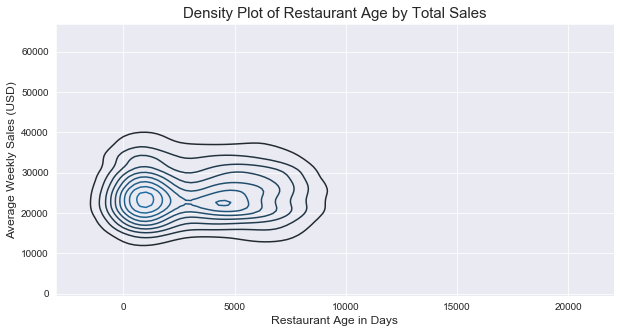

In [95]:
plt.figure(figsize=(10,5))
sns.kdeplot(age_explore.sort_values('sum_total_sales')['rest_age'], 
               age_explore.sort_values('sum_total_sales')['sum_total_sales'], gridsize=100)
plt.title('Density Plot of Restaurant Age by Total Sales', size = 15)
plt.xlabel('Restaurant Age in Days', size = 12)
plt.ylabel('Average Weekly Sales (USD)', size = 12)
plt.show()

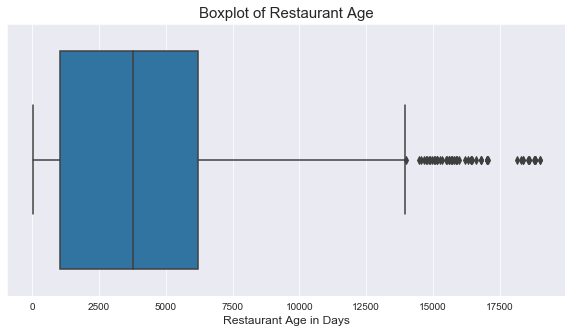

In [96]:
plt.figure(figsize=(10,5))
sns.boxplot(age_explore.sort_values('sum_total_sales')['rest_age'])
plt.title('Boxplot of Restaurant Age', size = 15)
plt.xlabel('Restaurant Age in Days', size = 12)
plt.show()

## Sales by TV Media

In [97]:
trps = modeling_df.loc[modeling_df['rest_number'] != 0].drop_duplicates('rest_number')['equal_trps_cm_ty'].reset_index()

In [98]:
trps_explore = pd.concat([mean_sales, trps], axis=1)[['rest_number', 'equal_trps_cm_ty', 'sum_total_sales']]
trps_explore.head()

,rest_number,equal_trps_cm_ty,sum_total_sales
0,1,0,24682.664000
1,2,0,28304.408365
2,3,95,18552.038627
3,4,95,21487.878592
4,10,95,23298.984087


In [99]:
print('Average TRPS Score for Bottom 100 Restaurants: ',
      round(np.mean(trps_explore.sort_values('sum_total_sales')[:50]['equal_trps_cm_ty']),2))
print('Average TRPS Score for Top 100 Restaurants: ',
      round(np.mean(trps_explore.sort_values('sum_total_sales', ascending = False)[:50]['equal_trps_cm_ty']),2))
print('Average TRPS Score for All Restaurants: ', round(np.mean(trps_explore['equal_trps_cm_ty']),2))

Average TRPS Score for Bottom 100 Restaurants:  102.0
Average TRPS Score for Top 100 Restaurants:  90.24
Average TRPS Score for All Restaurants:  89.09


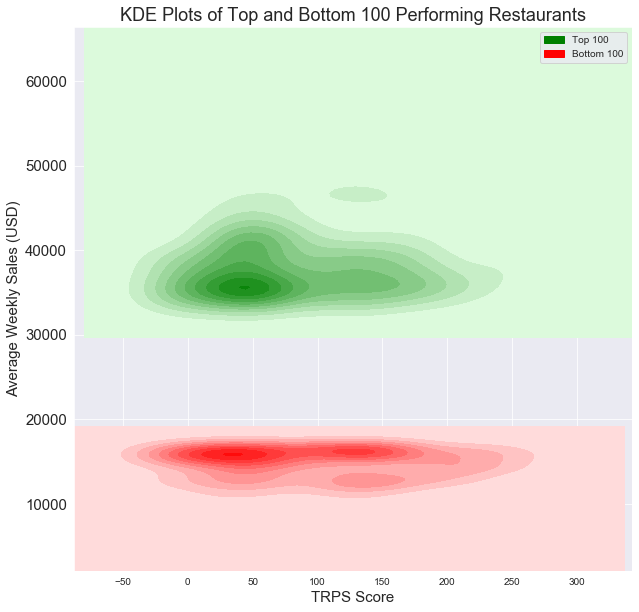

In [100]:
plt.figure(figsize = (10,10))
sns.kdeplot(trps_explore.sort_values('sum_total_sales',ascending = False)[:100]['equal_trps_cm_ty'], 
            trps_explore.sort_values('sum_total_sales',ascending = False)[:100]['sum_total_sales'], 
            label = 'Top 100', shade = True, color = 'green')
sns.kdeplot(trps_explore.sort_values('sum_total_sales')[:100]['equal_trps_cm_ty'], 
            trps_explore.sort_values('sum_total_sales')[:100]['sum_total_sales'], 
            label = 'Bottom 100', shade = 'True', color = 'red')
plt.title('KDE Plots of Top and Bottom 100 Performing Restaurants', size = 18)
plt.xlabel('TRPS Score', size = 15)
plt.ylabel('Average Weekly Sales (USD)', size =15)
plt.yticks(size = 15)
plt.legend()
plt.show()

## Competition in Radius

In [101]:
compete = modeling_df.loc[modeling_df['rest_number'] != 0].drop_duplicates('rest_number')['sum_of_competitors'].reset_index()

In [102]:
compete_explore = pd.concat([mean_sales, compete], axis=1)[['rest_number', 'sum_of_competitors', 'sum_total_sales']]
compete_explore

,rest_number,sum_of_competitors,sum_total_sales
0,1,3,24682.664000
1,2,5,28304.408365
2,3,3,18552.038627
3,4,5,21487.878592
4,10,4,23298.984087
...,...,...,...
1090,8438,0,18399.481667
1091,8440,0,4398.543125
1092,8445,0,21227.127941
1093,8517,0,54231.144815


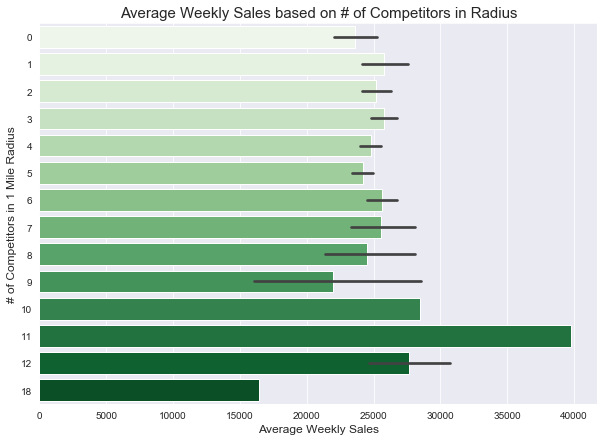

In [103]:
plt.figure(figsize = (10,7))
sns.barplot(compete_explore['sum_total_sales'], compete_explore['sum_of_competitors'],orient = 'h', palette='Greens')
plt.title('Average Weekly Sales based on # of Competitors in Radius', size = 15)
plt.ylabel('# of Competitors in 1 Mile Radius', size = 12)
plt.xlabel('Average Weekly Sales', size = 12)
plt.show()

# Modeling

## Preprocessing

In [104]:
modeling_dummied['sum total sales'] = modeling_dummied['sum total sales'].fillna(0.0)

In [105]:
y = modeling_dummied['sum total sales']
X = modeling_dummied.drop(columns = ['sum total sales','rest_dma_desc', 'rest_status', 'rest_addrstate', 
                                     'rest_remodeldt', 'rest_opendate', 'rest_closedate', 'print_media_drop_date'])

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.25)

## Random Forest Regressor Model

In [107]:
rfcr = RandomForestRegressor()

In [108]:
rfcr.fit(X_train, y_train)

RandomForestRegressor()

In [109]:
rfcr.score(X_test, y_test)

0.8993008803508324

In [110]:
coef_dict = dict(zip(X_train.columns, rfcr.feature_importances_))

In [111]:
feature_importances = pd.DataFrame(coef_dict.items(), columns=['coef_', 'coef_value'])

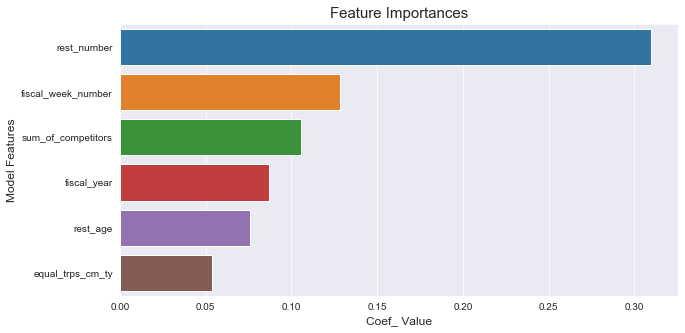

In [112]:
plt.figure(figsize = (10,5))
sns.barplot(feature_importances.sort_values('coef_value', ascending = False)[0:6]['coef_value'],
            feature_importances.sort_values('coef_value', ascending = False)[0:6]['coef_'], orient = 'h')
plt.title('Feature Importances', size = 15)
plt.ylabel('Model Features', size = 12)
plt.xlabel('Coef_ Value', size = 12)
plt.show()

In [113]:
prediction_df = modeling_dummied.drop_duplicates('rest_number').drop(columns = ['sum total sales','rest_dma_desc', 'rest_status', 'rest_addrstate', 
                                     'rest_remodeldt', 'rest_opendate', 'rest_closedate', 'print_media_drop_date'])

In [114]:
predictions = rfcr.predict(prediction_df)

In [115]:
predictions_df = pd.DataFrame(predictions, columns = ['weekly_predictions'])

In [116]:
round(np.sum(predictions_df['weekly_predictions']),2)

22533167.38

# Post-Presentation Work

## Animated Choropleth for Sales_TY

In [117]:
arg_sales

,Rest_Number,Rest_DMA_Code,Rest_DMA_Desc,Fiscal_Year,Fiscal_Week_Number,Days_Date,Sales_TY
0,1,536,YOUNGSTOWN,2015,1,2014-12-29,2600.03
1,1,536,YOUNGSTOWN,2015,1,2014-12-30,2333.04
2,1,536,YOUNGSTOWN,2015,1,2014-12-31,2045.05
3,1,536,YOUNGSTOWN,2015,1,2015-01-01,1355.33
4,1,536,YOUNGSTOWN,2015,1,2015-01-02,2645.63
...,...,...,...,...,...,...,...
785501,9002,524,ATLANTA,2018,52,2018-12-26,2530.15
785502,9002,524,ATLANTA,2018,52,2018-12-27,2534.33
785503,9002,524,ATLANTA,2018,52,2018-12-28,2767.72
785504,9002,524,ATLANTA,2018,52,2018-12-29,2607.02


In [118]:
restaurant

,REST_NUMBER,REST_STATUS,REST_ADDRSTATE,REST_REMODELDT,REST_OPENDATE,REST_CLOSEDATE
0,1,Open,OH,2016-11-28,1964-07-23,1753-01-01
1,2,Open,OH,2008-08-27,1965-08-31,1753-01-01
2,3,Open,OH,2016-10-26,1965-10-28,1753-01-01
3,4,Open,OH,1753-01-01,1975-08-12,1753-01-01
4,6,Closed,PA,1753-01-01,1966-02-14,2004-05-23
...,...,...,...,...,...,...
5349,8772,Pending,NM,1753-01-01,1753-01-01,1753-01-01
5350,9000,Closed,IL,1753-01-01,2005-09-12,2006-12-29
5351,9001,Closed,GA,1753-01-01,2006-04-13,2006-12-23
5352,9002,Open,GA,1753-01-01,2006-07-06,1753-01-01


In [150]:
daily_df = arg_sales.merge(restaurant, how = 'left', left_on = 'Rest_Number', right_on='REST_NUMBER')

In [130]:
daily_df = daily_df.loc[daily_df['Fiscal_Year'] == 2015]

In [131]:
daily_df = daily_df.groupby(['Days_Date', 'REST_ADDRSTATE']).sum().reset_index().sort_values('Days_Date')

In [136]:
daily_df['Days_Date'] = daily_df['Days_Date'].astype('str')

In [139]:
fig = px.choropleth(daily_df, 
                    locations = 'REST_ADDRSTATE',
                   locationmode = 'USA-states',
                   color = 'Sales_TY', 
                   animation_frame = 'Days_Date', 
                   scope = 'usa')

In [140]:
fig.show()

## Write function for Animated Choropleth Maps

In [151]:
def make_choropleth(daily_df1):
    daily_df = daily_df1
    year = int(input('Type year to plot...'))
    daily_df = daily_df1.loc[daily_df['Fiscal_Year'] == year]
    daily_df = daily_df.groupby(['Days_Date', 'REST_ADDRSTATE']).sum().reset_index().sort_values('Days_Date')
    daily_df['Days_Date'] = daily_df['Days_Date'].astype('str')
    fig = px.choropleth(daily_df, 
                    locations = 'REST_ADDRSTATE',
                   locationmode = 'USA-states',
                   color = 'Sales_TY', 
                   animation_frame = 'Days_Date', 
                   scope = 'usa', )
    fig.show()

In [152]:
make_choropleth(daily_df1)

Type year to plot...2018


## Static Choropleth Map

In [153]:
static_df = arg_sales.merge(restaurant, how = 'left', left_on = 'Rest_Number', right_on='REST_NUMBER')

In [161]:
static_df1 = static_df.loc[static_df['Fiscal_Year'] == 2015]
static_df1= static_df1.groupby(['Fiscal_Year',
                   'REST_ADDRSTATE']).sum().reset_index().sort_values('Fiscal_Year')
static_df1

,Fiscal_Year,REST_ADDRSTATE,Rest_Number,Rest_DMA_Code,Fiscal_Week_Number,Sales_TY,REST_NUMBER
0,2015,AL,130521079,16084436,661024,8.751718e+07,130521079
22,2015,WI,10580178,933065,40068,6.364080e+06,10580178
21,2015,VA,5535320,379162,20034,1.704617e+06,5535320
20,2015,UT,30205420,9297750,328461,4.030463e+07,30205420
19,2015,TX,10262,8722,469,0.000000e+00,10262
18,2015,TN,86377518,11980897,495117,6.004296e+07,86377518
17,2015,SC,36522373,3689771,224306,2.503610e+07,36522373
16,2015,PA,126615043,14400612,753269,9.123684e+07,126615043
15,2015,OH,125704683,20244549,1055233,1.324676e+08,125704683
14,2015,NY,501270,31062,3038,1.699410e+05,501270


In [166]:
fig = px.choropleth(static_df1, 
                    locations = 'REST_ADDRSTATE',
                   locationmode = 'USA-states',
                   color = 'Sales_TY',  
                   scope = 'usa')

In [167]:
fig.show()

In [171]:
def make_static_choropleth(static_df):
    year = int(input('Choose a year to plot...'))
    static_df = static_df.loc[static_df['Fiscal_Year'] == year]
    static_df= static_df.groupby(['Fiscal_Year',
                   'REST_ADDRSTATE']).sum().reset_index().sort_values('Fiscal_Year')
    fig = px.choropleth(static_df1, 
                    locations = 'REST_ADDRSTATE',
                   locationmode = 'USA-states',
                   color = 'Sales_TY',  
                   scope = 'usa')
    fig.show()

In [172]:
make_static_choropleth(static_df)

Choose a year to plot...2016
